<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Constructing an efficient frontier

In [1]:
import pandas_datareader.data as web
import numpy as np, pandas as pd, scipy as sp
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
p = print

In [2]:
# Load stock data
df = pd.read_csv('IBM_MSFT.csv', index_col='Date', parse_dates=True)

In [3]:
# Print summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2010-01-04 to 2018-12-31
Data columns (total 2 columns):
IBM     2264 non-null float64
MSFT    2264 non-null float64
dtypes: float64(2)
memory usage: 53.1 KB


In [4]:
# List the stock tickers
tickers = df.columns

In [5]:
# Calculate daily returns
returns = df.pct_change().dropna()

In [6]:
# Calculate mean of returns
mean_return = returns.mean()

In [7]:
# Calculate standard deviation of returns
return_stdev = returns.std()

In [8]:
# Calculate covariance matrix
cov_matrix = returns.cov()

In [9]:
# Hypothetical risk-free rate of return
rf = 0.00003

In [10]:
# Set the number of simulations
num_portfolios = 25000

# Initialize simulatio results to all zeros
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    # Generate random weights
    weights = np.random.random(len(tickers))
    # Normalize the weights and set the sum to 1
    weights /= np.sum(weights)
    
    # Calculate the portfolio return
    portfolio_return = weights.T.dot(mean_return * 252)
    # Calculate the portfolio volatility
    portfolio_stdev = np.sqrt(weights.T.dot(cov_matrix * 252).dot(weights))
    
    # Store the results in a defined array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_stdev
    # Cacluate the Sharpe ratio and store the result in the array
    results[2,i] = (results[0,i] - rf) / results[1,i]

In [11]:
# Save the simulations in a dataframe
results_df = pd.DataFrame(results.T, columns=['Ret','Vol','Sharpe'])

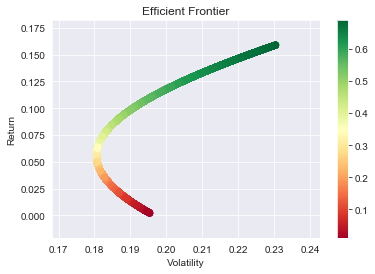

In [12]:
# Plot the efficient frontier of the two-stock portfolio simulations
plt.scatter(results_df.Vol, results_df.Ret, c=results_df.Sharpe, cmap='RdYlGn')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.colorbar();

In [13]:
# Load the stock data
df = pd.read_csv('efficient_frontier_data.csv', index_col='Date', parse_dates=True)

In [14]:
# Print the summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2466 entries, 2010-01-04 to 2019-10-18
Data columns (total 4 columns):
AAPL    2466 non-null float64
IBM     2466 non-null float64
MSFT    2466 non-null float64
WMT     2466 non-null float64
dtypes: float64(4)
memory usage: 96.3 KB


In [15]:
# Make a list of stocks
tickers = df.columns

In [16]:
# Calcualte the daily returns
returns = df.pct_change().dropna()

In [17]:
# Calculate mean and standard deviation of returns
mean_return = returns.mean()
return_stdev = returns.std()

In [18]:
# Calcuate covariane of returns
cov_matrix = returns.cov()

In [19]:
# Hypothetical risk-free rate of return
rf = 0.00003

In [20]:
# Set the number of simulations
num_portfolios = 25000

# Initialize simulatio results to all zeros
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    # Generate random weights
    weights = np.random.random(len(tickers))
    # Normalize the weights and set the sum to 1
    weights /= np.sum(weights)
    
    # Calculate the portfolio return
    portfolio_return = weights.T.dot(mean_return * 252)
    # Calculate the portfolio volatility
    portfolio_stdev = np.sqrt(weights.T.dot(cov_matrix * 252).dot(weights))
    
    # Store the results in a defined array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_stdev
    # Cacluate the Sharpe ratio and store the result in the array
    results[2,i] = (results[0,i] - rf) / results[1,i]

In [21]:
# Save the simulations in a dataframe
results_df = pd.DataFrame(results.T, columns=['Ret','Vol','Sharpe'])

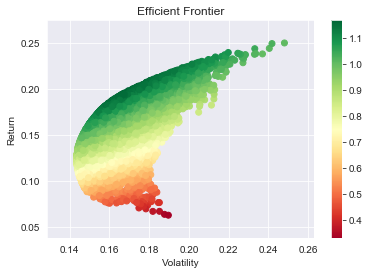

In [22]:
# Plot the efficient frontier of multi-stock portfolio simulations
plt.scatter(results_df.Vol, results_df.Ret, c=results_df.Sharpe, cmap='RdYlGn')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.colorbar();